In [15]:
import tensorflow as tf

In [16]:
import pandas as pd
poke_info=pd.read_csv('poke_img/pokemon.csv')
poke_info

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [17]:
poke_type=set()
poke_type.update(poke_info['Type2'].unique())
poke_type.update(poke_info['Type1'].unique())
len(poke_type) #"포켓몬 타입 갯수:"

19

In [18]:
ds = tf.keras.utils.image_dataset_from_directory(
    directory="./poke_img/images/",
    validation_split=0.2, # 이미지의 80%를 훈련에 사용하고 20%를 유효성 검사에 사용
    subset="both", 
    label_mode='int', # 원핫 인코딩
    seed=123, # 셔플이 기본적으로 참
    batch_size=32, # 일괄처리 묶음. 샘플의 갯수
    image_size=(224,224) # 이미지 크기
)
# test_ds = tf.keras.utils.image_dataset_from_directory(
#     directory="./poke_img/images/test_img/",
#     validation_split=0.2,
#     subset="validation",
#     label_mode='int', # 원핫 인코딩
#     seed=123,
#     batch_size=32, # 
#     image_size=(150,150) # 이미지 크기
# )


Found 809 files belonging to 1 classes.
Using 648 files for training.
Using 161 files for validation.


In [19]:
# ---------------------------------------------------------------------#

In [20]:
train_ds,test_ds=ds
print(len(train_ds),len(test_ds))

21 6


['images']


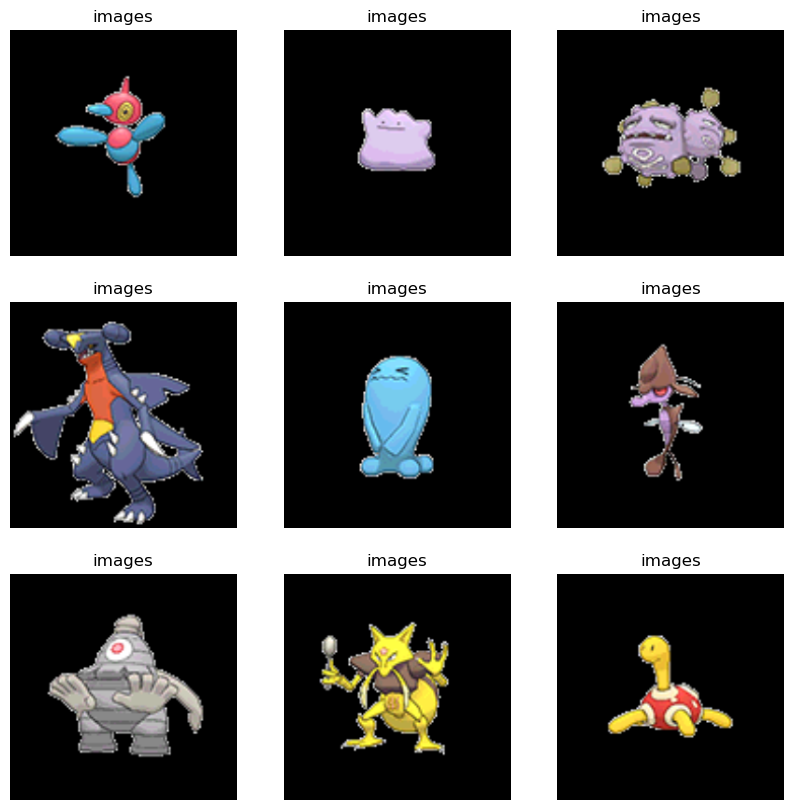

In [21]:
# 내부 폴더 명
class_names=train_ds.class_names 
print(class_names)

# 훈련 데이터세트의 처음 9개 이미지
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

['images']


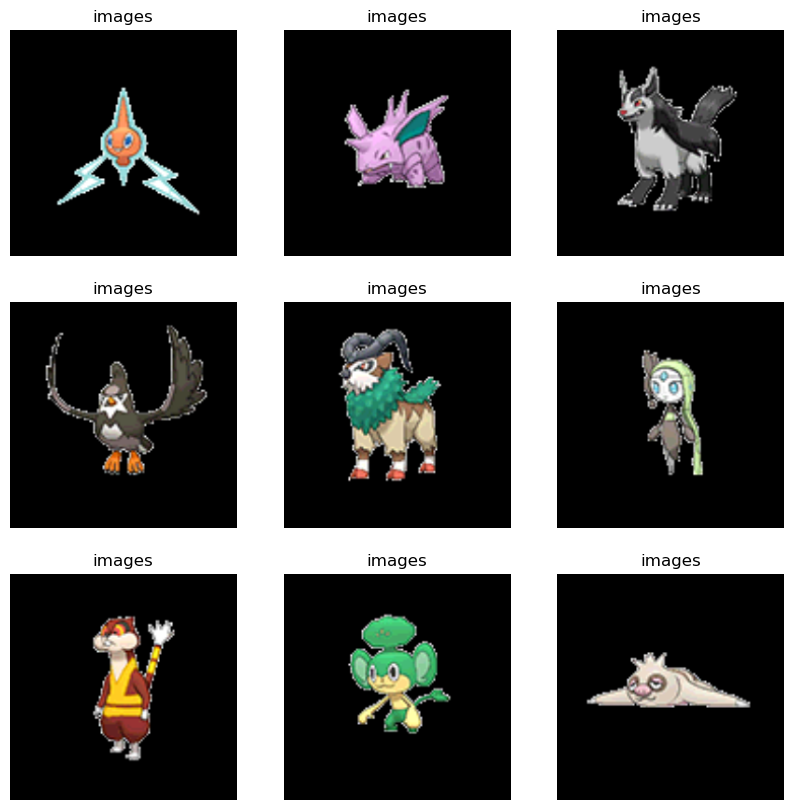

In [22]:
# 내부 폴더 명
class_names=test_ds.class_names 
print(class_names)

# 훈련 데이터세트의 처음 9개 이미지
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# 시작

2.  사전학습된 VGG16 모델 불러오기

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model

model=VGG16(weights='imagenet')
new_model=Model(
            inputs=model.input, outputs=model.get_layer("fc1").output
        )
new_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

6. 신경망 모델 학습

Epoch 1/5


21/21 [==============================] - 152s 7s/step - loss: 5.5325 - accuracy: 0.9506 - val_loss: 4.7432 - val_accuracy: 1.0000
Epoch 2/5
21/21 [==============================] - 148s 7s/step - loss: 4.7239 - accuracy: 1.0000 - val_loss: 4.7072 - val_accuracy: 1.0000
Epoch 3/5
21/21 [==============================] - 148s 7s/step - loss: 4.7074 - accuracy: 1.0000 - val_loss: 4.7028 - val_accuracy: 1.0000
Epoch 4/5
21/21 [==============================] - 149s 7s/step - loss: 4.7052 - accuracy: 1.0000 - val_loss: 4.7022 - val_accuracy: 1.0000
Epoch 5/5
21/21 [==============================] - 151s 7s/step - loss: 4.7049 - accuracy: 1.0000 - val_loss: 4.7021 - val_accuracy: 1.0000


C:\Users\skadl\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


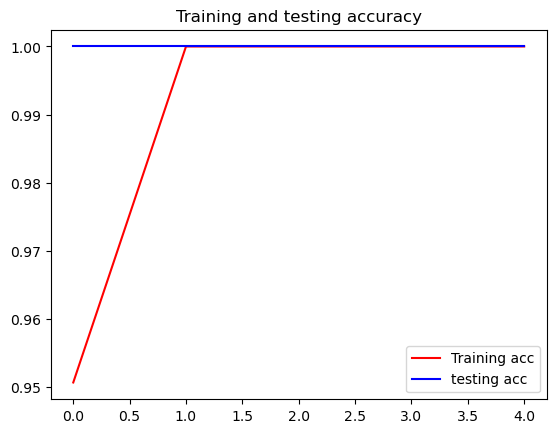

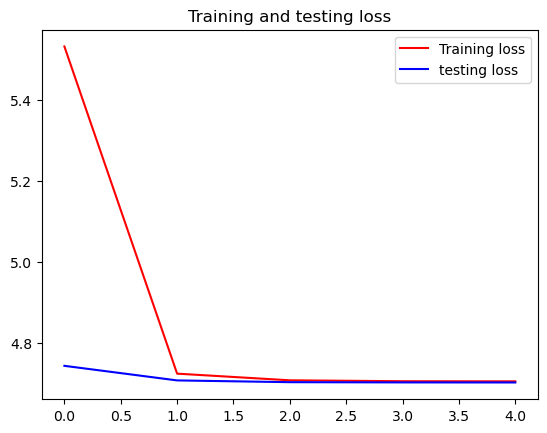

In [24]:
# 모델 학습
history = new_model.fit(train_ds, epochs=5, # 마지막에 변경
                        validation_data=test_ds)

new_model.save("mo.h5")                        
                        
# 최종 결과 리포트
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

from matplotlib import pyplot as plt

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='testing acc')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='testing loss')
plt.title('Training and testing loss')
plt.legend()

plt.show()

# 저장 모델 불러오기
from keras.models import load_model

new_model = load_model("mo.h5")

유사도 측정

In [25]:
import numpy as np

In [26]:
# 코사인 유사도 함수
def _cos_sin(A, B):
    return np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

In [27]:
V1=np.array([1,2,3])
V2=np.array([0,0,3])
# np.linalg.norm(V1)
_cos_sin(V1,V2) # 유사도 1~-1

0.8017837257372732

In [28]:
# 지나간 layer 순서
dict([(layer.name, layer) for layer in new_model.layers])

{'input_4': <keras.src.engine.input_layer.InputLayer at 0x1048357a620>,
 'block1_conv1': <keras.src.layers.convolutional.conv2d.Conv2D at 0x104834ad5d0>,
 'block1_conv2': <keras.src.layers.convolutional.conv2d.Conv2D at 0x104899a4430>,
 'block1_pool': <keras.src.layers.pooling.max_pooling2d.MaxPooling2D at 0x1048357a680>,
 'block2_conv1': <keras.src.layers.convolutional.conv2d.Conv2D at 0x104899f0e80>,
 'block2_conv2': <keras.src.layers.convolutional.conv2d.Conv2D at 0x104899f0f70>,
 'block2_pool': <keras.src.layers.pooling.max_pooling2d.MaxPooling2D at 0x104899f1510>,
 'block3_conv1': <keras.src.layers.convolutional.conv2d.Conv2D at 0x104899f1d20>,
 'block3_conv2': <keras.src.layers.convolutional.conv2d.Conv2D at 0x104899a4610>,
 'block3_conv3': <keras.src.layers.convolutional.conv2d.Conv2D at 0x1048354b220>,
 'block3_pool': <keras.src.layers.pooling.max_pooling2d.MaxPooling2D at 0x104899f2080>,
 'block4_conv1': <keras.src.layers.convolutional.conv2d.Conv2D at 0x104899f2860>,
 'block4

In [29]:
# 분류 모델을 지난 포켓몬들

In [30]:
features = []

import os
img_paths="./poke_img/images/images/"
file_list=os.listdir(img_paths)
file_list[:3]

['abomasnow.png', 'abra.png', 'absol.png']

In [31]:
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

for img_path in file_list:
    img=Image.open(img_paths+img_path)

    # Resize the image
    img = img.resize((224, 224))
    # Convert the image color space
    img = img.convert('RGB')
    # Reformat the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x) #preprocess_input 함수는 모델에 필요한 형식에 이미지를 적절하게 맞추기위한 것. 일부 모델은 0에서 1까지의 값을 가진 이미지를 사용합니다. 다른 모델은 -1에서 +1까지
    # Extract Features
    feature = new_model.predict(x)[0] # 예측

    features.append(feature / np.linalg.norm(feature))

1/1 [==============================] - 0s 89ms/step


c:\ProgramData\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 92ms/step


In [32]:
# 검색으로 들어온 포켓몬

In [33]:
img_path="./poke_img/test_img/pika.png"


In [34]:

img=Image.open(img_path)

# Resize the image
img = img.resize((224, 224))
# Convert the image color space
img = img.convert('RGB')
# Reformat the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) #preprocess_input 함수는 모델에 필요한 형식에 이미지를 적절하게 맞추기위한 것. 일부 모델은 0에서 1까지의 값을 가진 이미지를 사용합니다. 다른 모델은 -1에서 +1까지
# Extract Features
feature = new_model.predict(x)[0] # 예측
feature

1/1 [==============================] - 0s 99ms/step


array([1.6713246e+11, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [35]:
query=feature / np.linalg.norm(feature) # 크기 축소? 왜 함?

In [36]:
query

array([0.80349475, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [37]:
# 유사도 차이

In [38]:
for one in features:
    print(one)


[0.7995415 0.        0.        ... 0.        0.        0.       ]
[0.81117755 0.         0.         ... 0.         0.         0.        ]
[0.80809593 0.         0.         ... 0.         0.         0.        ]
[0.8031328 0.        0.        ... 0.        0.        0.       ]
[0.80575645 0.         0.         ... 0.         0.         0.        ]
[0.80033 0.      0.      ... 0.      0.      0.     ]
[0.8005985 0.        0.        ... 0.        0.        0.       ]
[0.8052463 0.        0.        ... 0.        0.        0.       ]
[0.8032191 0.        0.        ... 0.        0.        0.       ]
[0.8098804 0.        0.        ... 0.        0.        0.       ]
[0.7929311 0.        0.        ... 0.        0.        0.       ]
[0.80823773 0.         0.         ... 0.         0.         0.        ]
[0.79733545 0.         0.         ... 0.         0.         0.        ]
[0.7988596 0.        0.        ... 0.        0.        0.       ]
[0.81354064 0.         0.         ... 0.         0.       

In [39]:
similars=[]
for one in features:
    similars.append(_cos_sin(one, query))
# 가장 유사도가 큰 순으로 
ids=np.argsort(similars)[:30]

scores = [(similars[id], file_list[id], id) for id in ids[::-1]]
scores

[(0.99837285, 'shuckle.png', 619),
 (0.9983728, 'vibrava.png', 753),
 (0.9983631, 'tangela.png', 692),
 (0.99835837, 'chingling.png', 106),
 (0.99835277, 'magikarp.png', 400),
 (0.9983437, 'pansear.png', 498),
 (0.99834055, 'gothita.png', 268),
 (0.99833095, 'corphish.png', 122),
 (0.9983291, 'krabby.png', 349),
 (0.9983212, 'poliwrath.png', 528),
 (0.9983141, 'spinda.png', 657),
 (0.9983101, 'surskit.png', 679),
 (0.9983003, 'snivy.png', 645),
 (0.9982946, 'nidorino.png', 471),
 (0.9982897, 'ariados.png', 22),
 (0.9982859, 'jolteon.png', 326),
 (0.99825484, 'poliwag.png', 526),
 (0.99823874, 'ledyba.png', 368),
 (0.99822617, 'mime-jr.png', 443),
 (0.99822193, 'aron.png', 25),
 (0.99821573, 'croagunk.png', 133),
 (0.99820787, 'dedenne.png', 147),
 (0.99817044, 'klefki.png', 343),
 (0.9981638, 'chimchar.png', 103),
 (0.9981322, 'fletchling.png', 221),
 (0.99808997, 'abra.png', 1),
 (0.9980761, 'barboach.png', 38),
 (0.99793464, 'poliwhirl.png', 527),
 (0.997801, 'rotom.png', 575),
 (0.9

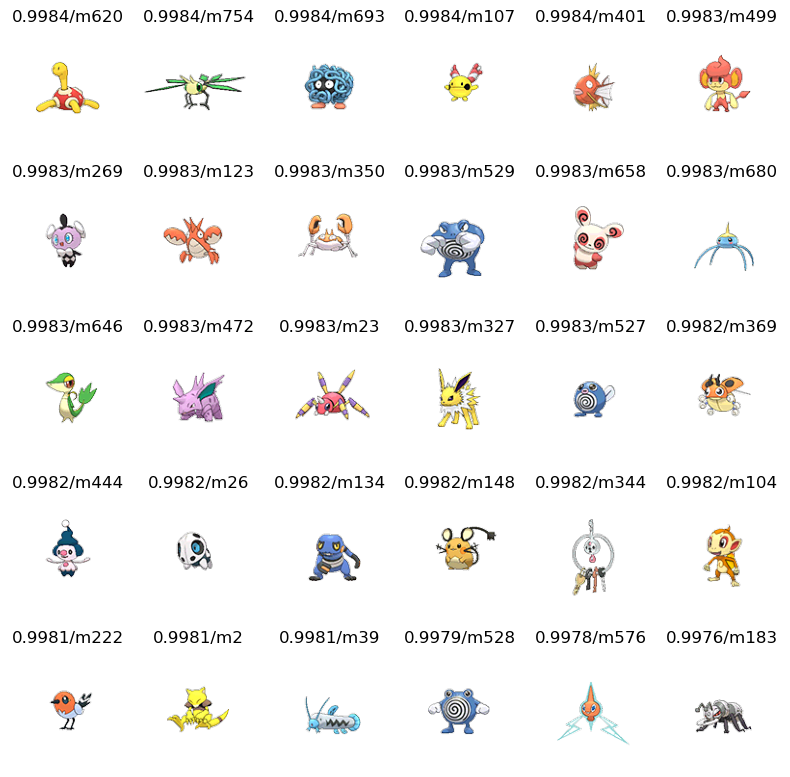

In [42]:
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],4)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(img_paths+score[1]))
fig.tight_layout()
plt.show()